# Mini Projekt 

- Fabian Oppermann
- Petruta-Denisa Biholari
- Philipp Hasel

https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

## 1. Datenbeschreibung

Die Daten stammen von Kaggle und beinhalten die meistgestreamten Songs auf Spotify im Jahr 2024. Die Daten sind in einer CSV-Datei gespeichert und enthalten folgende Spalten:

| Feld | Datentyp | Beschreibung |
|------|----------|-------------|
| Track | String | Name des Musikstücks |
| Album Name | String | Name des Albums, zu dem der Track gehört |
| Artist | String | Name des Künstlers oder der Band |
| Release Date | Date | Veröffentlichungsdatum des Tracks |
| ISRC | String | International Standard Recording Code (eindeutige Kennzeichnung) |
| All Time Rank | Integer | Gesamtranking des Songs auf allen Plattformen |
| Track Score | Float | Berechneter Popularitätswert des Tracks |
| Spotify Streams | Numeric | Anzahl der Streams auf Spotify |
| Spotify Playlist Count | Integer | Anzahl der Spotify-Playlists, die den Track enthalten |
| Spotify Playlist Reach | Numeric | Potenzielle Reichweite durch Spotify-Playlists |
| Spotify Popularity | Integer | Popularitätswert auf Spotify (0-100) |
| YouTube Views | Numeric | Anzahl der Aufrufe auf YouTube |
| YouTube Likes | Numeric | Anzahl der Likes auf YouTube |
| TikTok Posts | Numeric | Anzahl der TikTok-Beiträge mit dem Track |
| TikTok Likes | Numeric | Anzahl der Likes auf TikTok-Beiträgen mit dem Track |
| TikTok Views | Numeric | Anzahl der Aufrufe auf TikTok-Beiträgen mit dem Track |
| YouTube Playlist Reach | Numeric | Potenzielle Reichweite durch YouTube-Playlists |
| Apple Music Playlist Count | Integer | Anzahl der Apple Music-Playlists mit dem Track |
| AirPlay Spins | Numeric | Anzahl der Radiowiedergaben über AirPlay |
| SiriusXM Spins | Integer | Anzahl der Wiedergaben auf SiriusXM |
| Deezer Playlist Count | Integer | Anzahl der Deezer-Playlists mit dem Track |
| Deezer Playlist Reach | Numeric | Potenzielle Reichweite durch Deezer-Playlists |
| Amazon Playlist Count | Integer | Anzahl der Amazon Music-Playlists mit dem Track |
| Pandora Streams | Numeric | Anzahl der Streams auf Pandora |
| Pandora Track Stations | Numeric | Anzahl der Pandora-Stationen, die den Track spielen |
| Soundcloud Streams | Numeric | Anzahl der Streams auf Soundcloud |
| Shazam Counts | Numeric | Anzahl der Shazam-Erkennungen |
| TIDAL Popularity | Integer | Popularitätswert auf TIDAL |
| Explicit Track | Boolean | Kennzeichnung für explizite Inhalte (0=nein, 1=ja) |



In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipf

In [ ]:
import pandas as pd

# CSV laden
df = pd.read_csv("./Most Streamed Spotify Songs 2024.csv", encoding="latin1")

# Erste Stichprobe und Überblick
df.sample(3)
df.head()
df.info()
df.describe(include='all')

# Unique-Werte prüfen (z. B. für kategorische Features)
for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals < 20:
        print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

## 2. Datenvisualisierung vor der Datenbereinigung

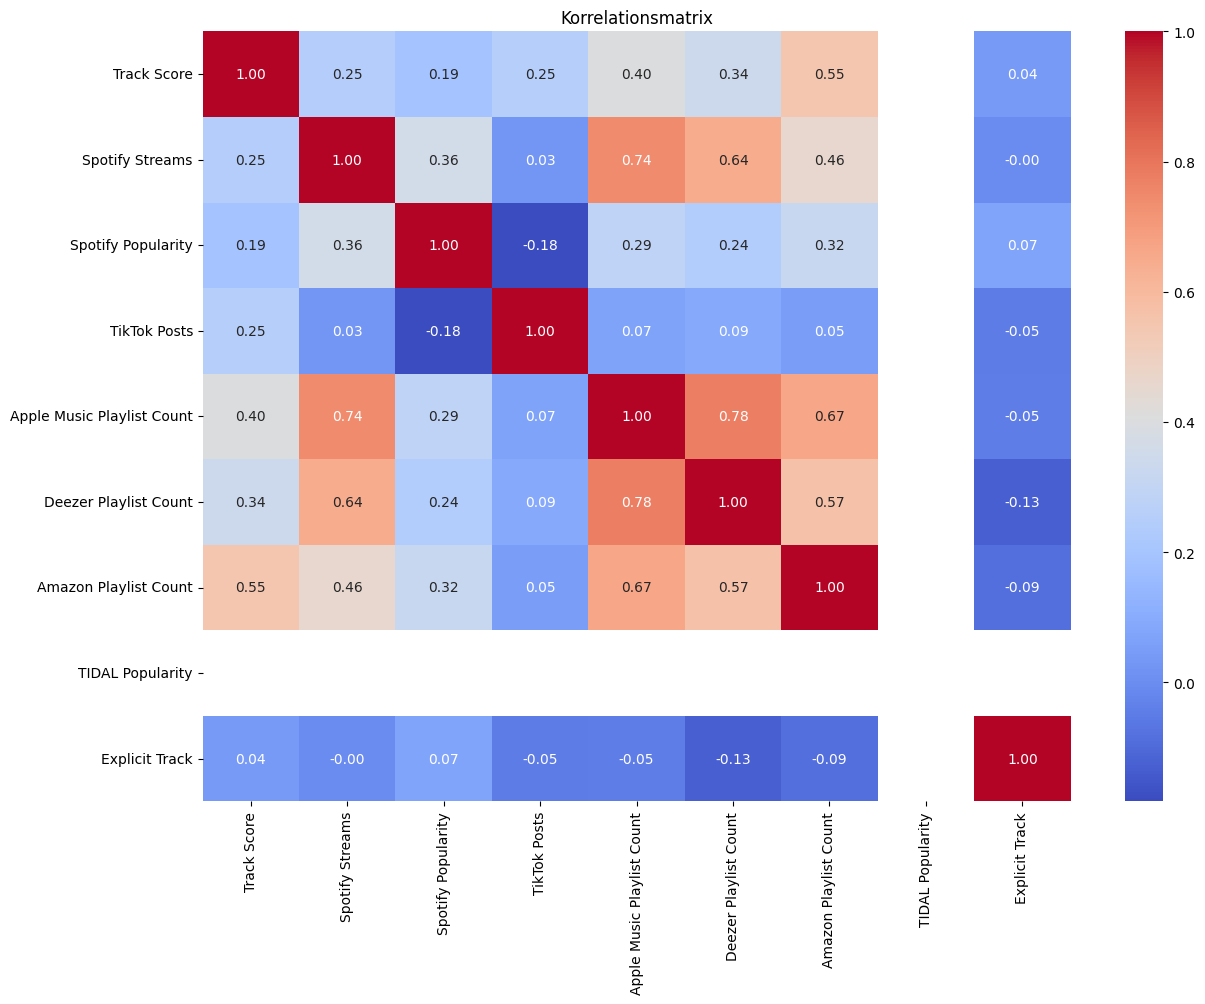

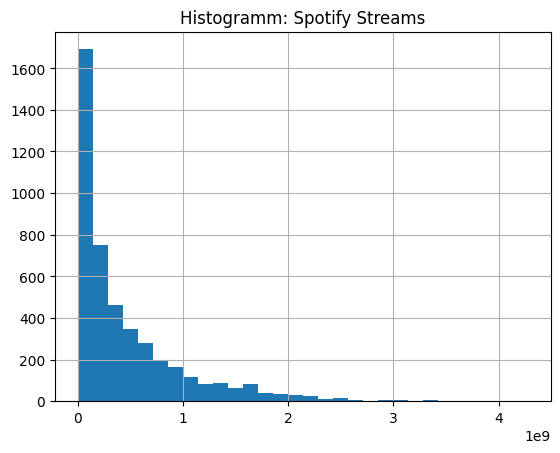

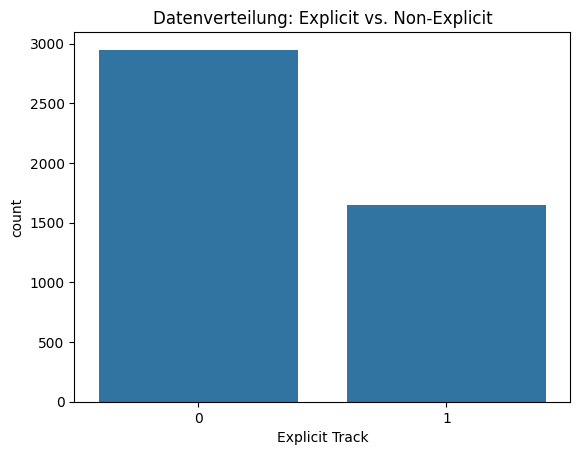

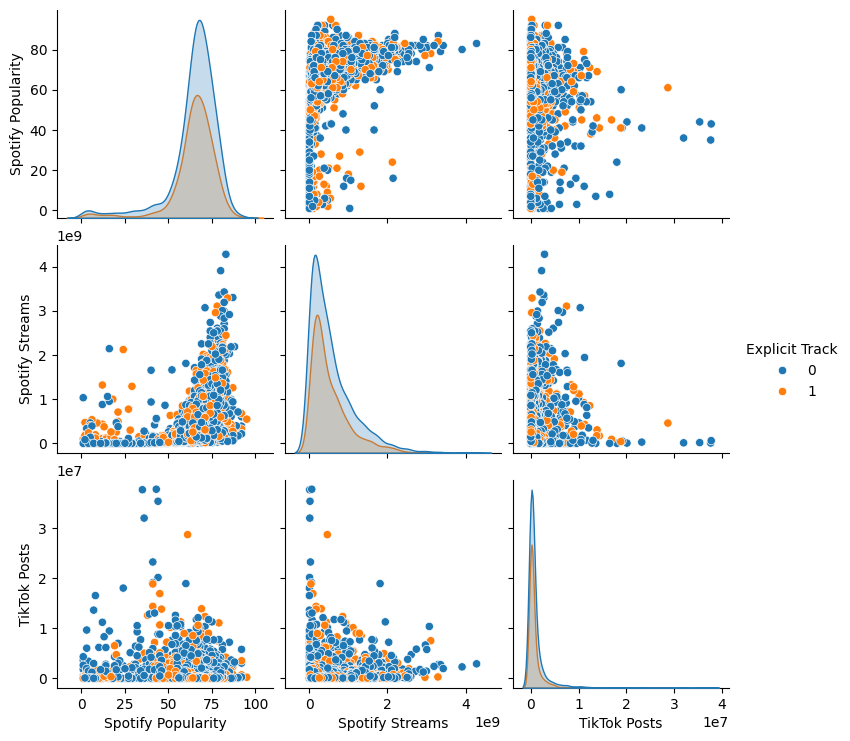

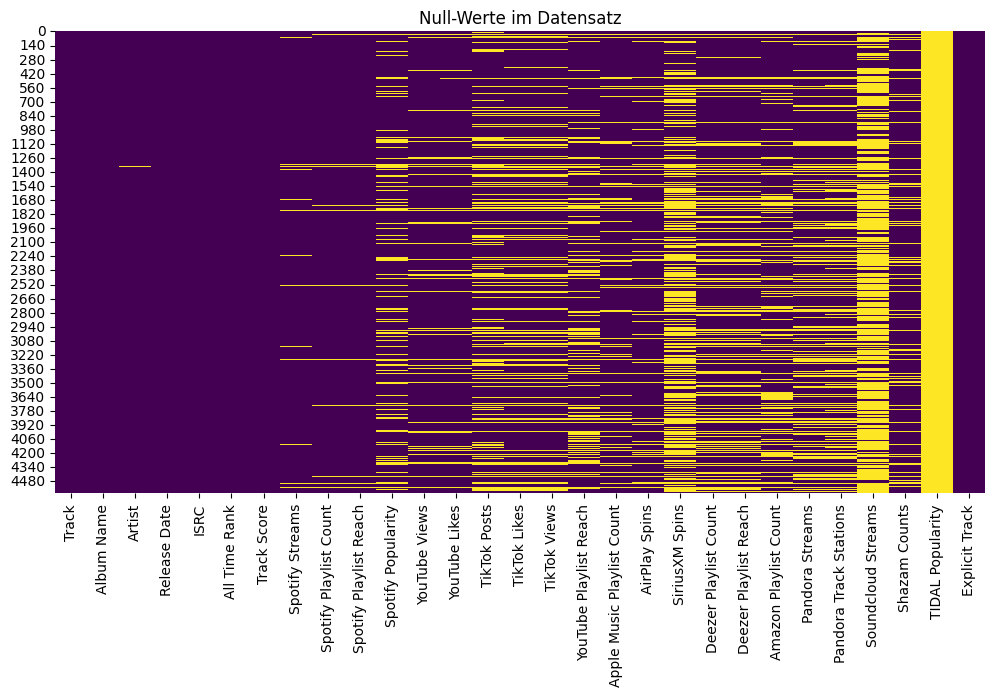

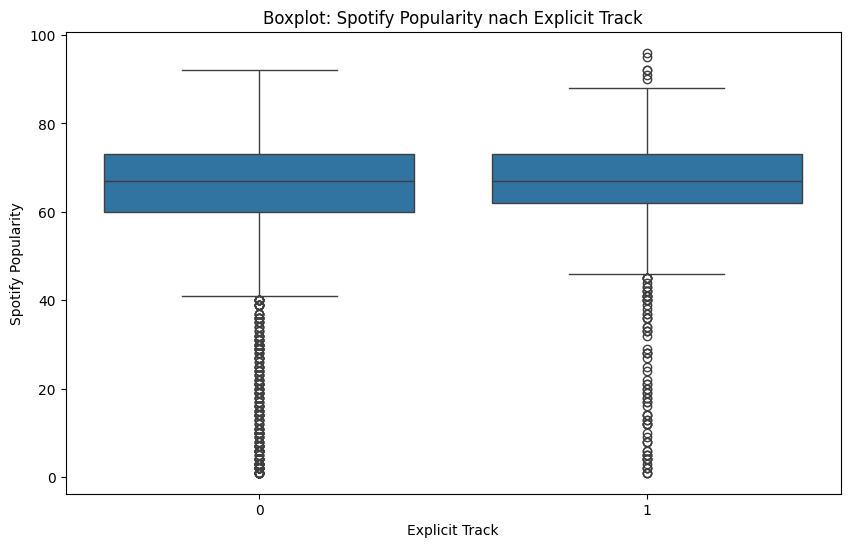

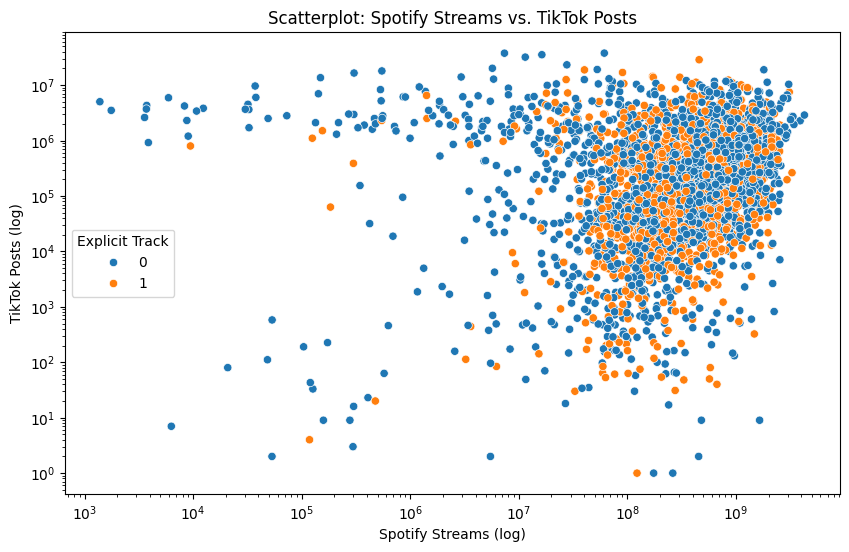

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hilfsfunktion zum Bereinigen von Zahlen mit Kommas
def to_numeric(series):
	return pd.to_numeric(series.astype(str).str.replace(',', ''), errors='coerce')

# Relevante Spalten bereinigen
df['Spotify Streams'] = to_numeric(df['Spotify Streams'])
df['TikTok Posts'] = to_numeric(df['TikTok Posts'])
df['Spotify Popularity'] = pd.to_numeric(df['Spotify Popularity'], errors='coerce')

# Korrelationen
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# Histogramme für ausgewählte Features
df['Spotify Streams'].hist(bins=30)
plt.title("Histogramm: Spotify Streams")
plt.show()

# Datenverteilung Zielklasse
sns.countplot(x='Explicit Track', data=df)
plt.title("Datenverteilung: Explicit vs. Non-Explicit")
plt.show()

# Paarweise Beziehungen
sns.pairplot(df[['Spotify Popularity', 'Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna(), hue='Explicit Track')
plt.show()

# Nullwerte im Datensatz als Heatmap anzeigen
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null-Werte im Datensatz")
plt.show()

# Boxplot für Spotify Popularity nach Explicit Track
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit Track', y='Spotify Popularity', data=df)
plt.title("Boxplot: Spotify Popularity nach Explicit Track")
plt.show()

# Scatterplot für Spotify Streams vs. TikTok Posts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spotify Streams', y='TikTok Posts', hue='Explicit Track', data=df)
plt.title("Scatterplot: Spotify Streams vs. TikTok Posts")
plt.xscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
plt.yscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
plt.xlabel("Spotify Streams (log)")
plt.ylabel("TikTok Posts (log)")
plt.legend(title='Explicit Track')
plt.show()


## 3. Datenberenigung

In [ ]:
# Entfernen von Duplikaten
df = df.drop_duplicates()

# Fehlende Werte analysieren
missing = df.isnull().sum()
print(missing[missing > 0])

# Zeilen mit fehlenden Werten in kritischen Spalten entfernen
df = df.dropna(subset=['Spotify Streams', 'TikTok Posts', 'Spotify Popularity'])

# tidal Spalten löschen die nicht relevant sind
df = df.drop(columns=["TIDAL Popularity"])

# Reduktion: Entferne identische/irrelevante Variablen
df = df.drop(columns=['Track', 'Album Name', 'ISRC'])

# Datei speichern
df.to_csv("korr.csv", index=False)

Artist                           5
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popularity              4598
dtype: int64


## 4. Datenvisualisierung nach der Datenberenigung

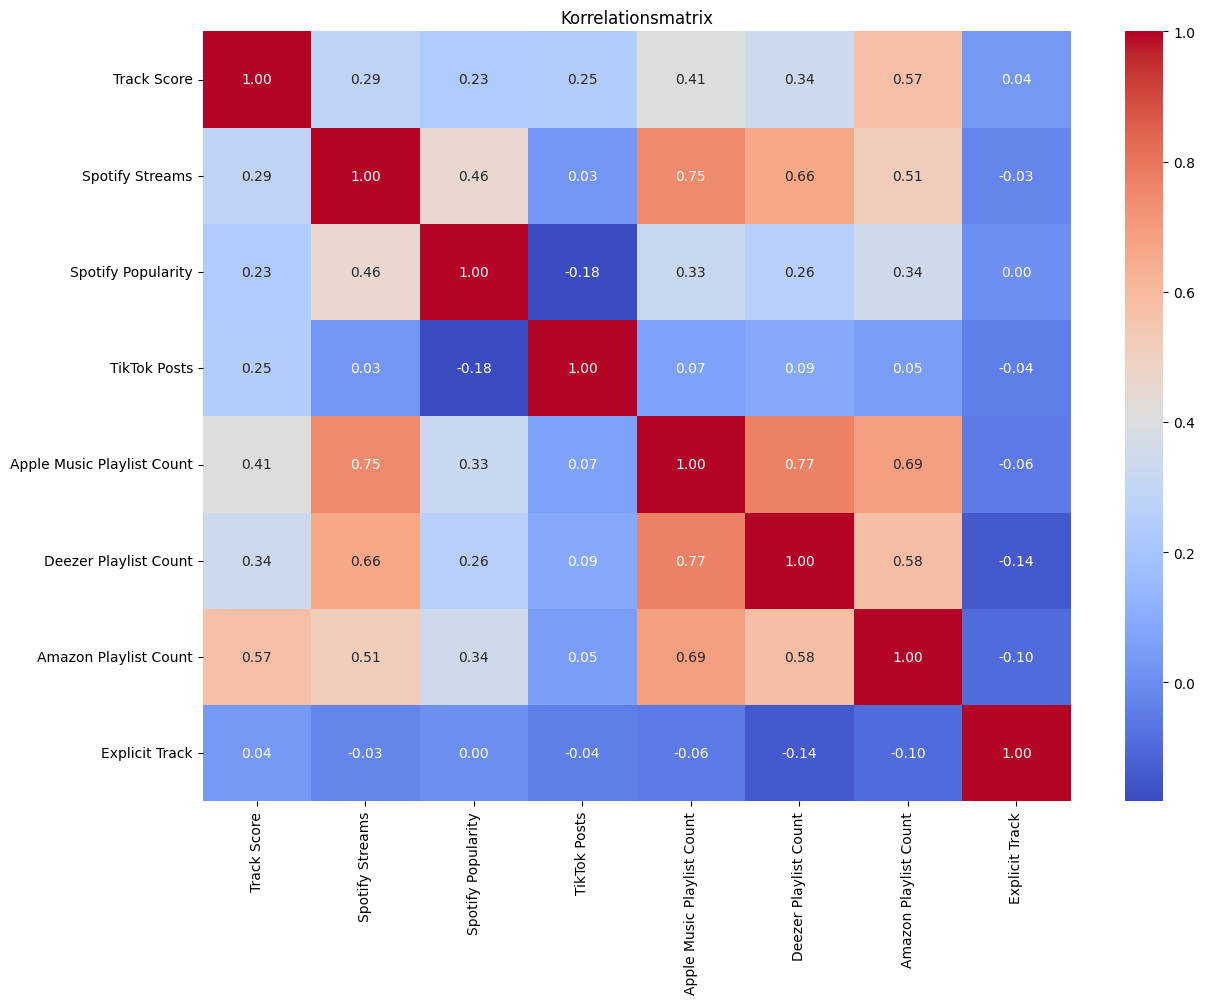

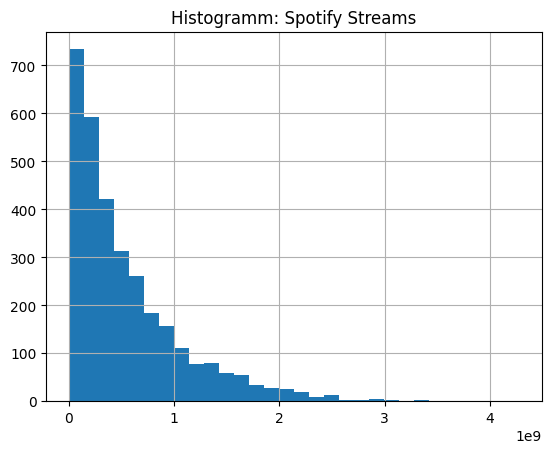

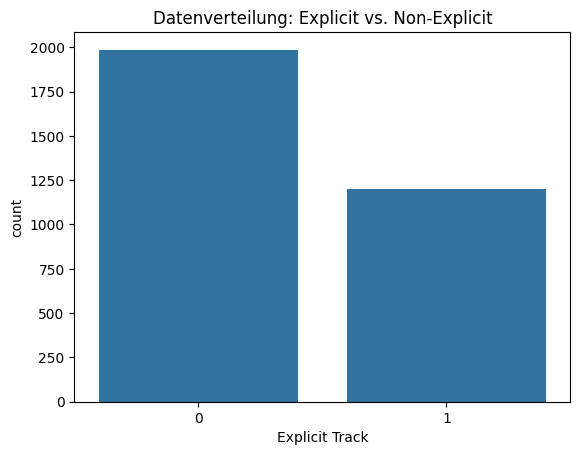

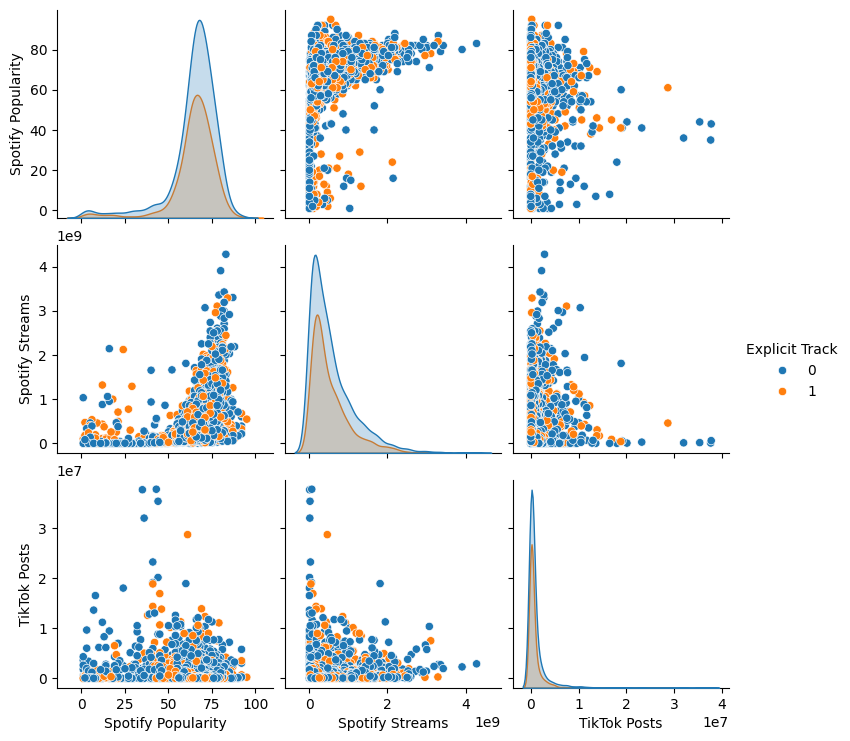

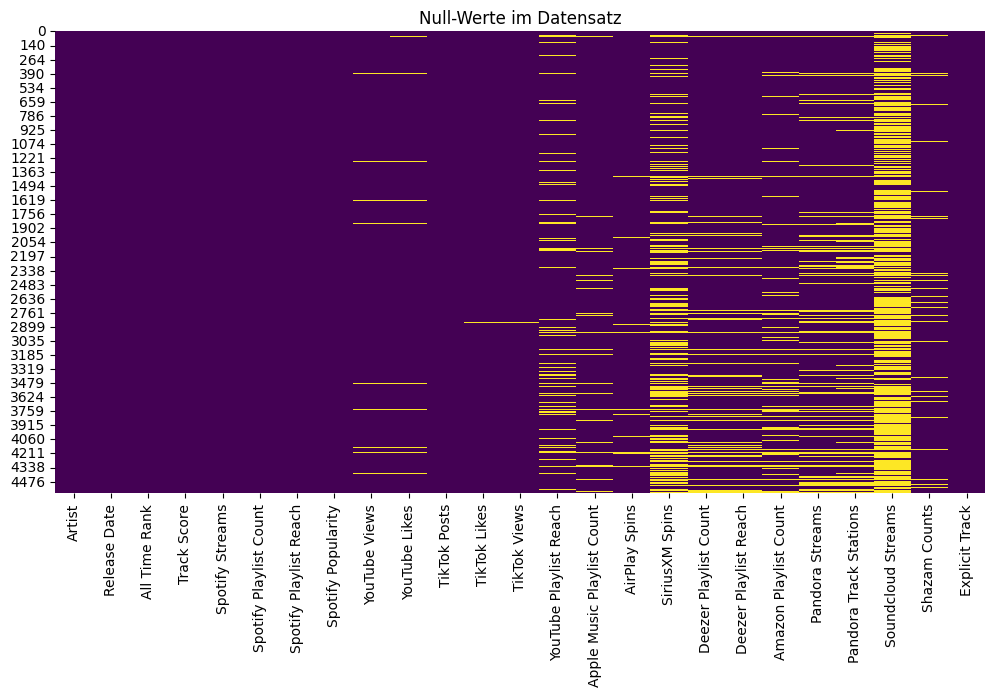

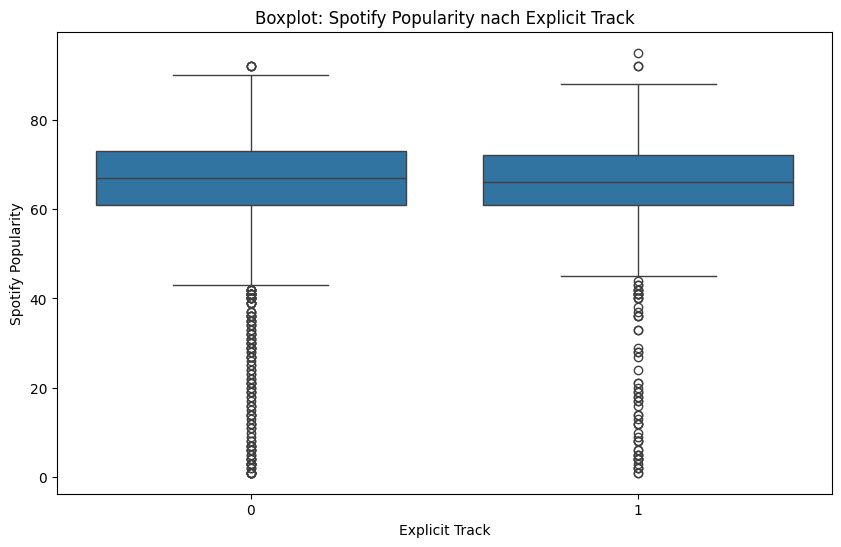

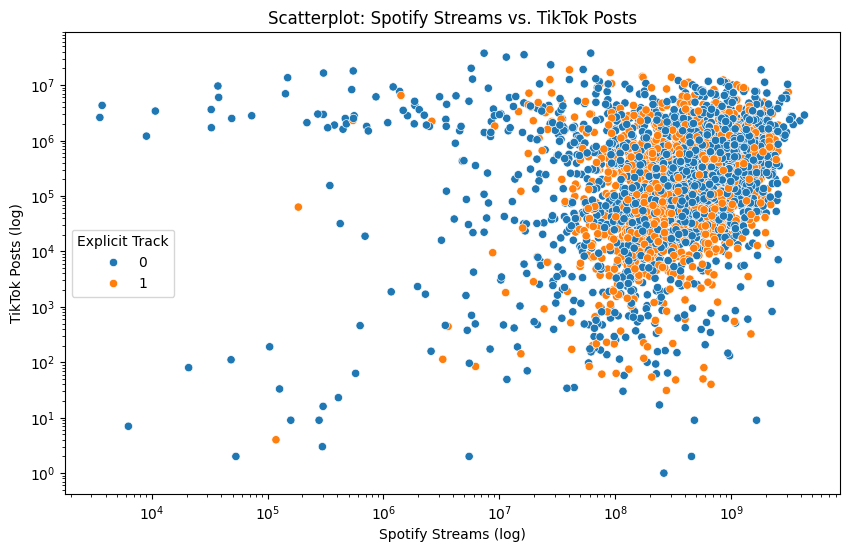

In [ ]:
# Korrelationen
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# Histogramme für ausgewählte Features
df['Spotify Streams'].hist(bins=30)
plt.title("Histogramm: Spotify Streams")
plt.show()

# Datenverteilung Zielklasse
sns.countplot(x='Explicit Track', data=df)
plt.title("Datenverteilung: Explicit vs. Non-Explicit")
plt.show()

# Paarweise Beziehungen
sns.pairplot(df[['Spotify Popularity', 'Spotify Streams', 'TikTok Posts', 'Explicit Track']].dropna(), hue='Explicit Track')
plt.show()

# Nullwerte im Datensatz als Heatmap anzeigen
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null-Werte im Datensatz")
plt.show()

# Boxplot für Spotify Popularity nach Explicit Track
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit Track', y='Spotify Popularity', data=df)
plt.title("Boxplot: Spotify Popularity nach Explicit Track")
plt.show()

# Scatterplot für Spotify Streams vs. TikTok Posts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spotify Streams', y='TikTok Posts', hue='Explicit Track', data=df)
plt.title("Scatterplot: Spotify Streams vs. TikTok Posts")
plt.xscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
plt.yscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit
plt.xlabel("Spotify Streams (log)")
plt.ylabel("TikTok Posts (log)")
plt.legend(title='Explicit Track')
plt.show()


## Erkenntnisse:

## 5. Datenvorbereitung

Klassenverteilung:
 PopularityClass
Medium    1970
High      1043
Low        173
Name: count, dtype: int64

 Modell: SVM
              precision    recall  f1-score   support

        High       0.82      0.50      0.62       209
         Low       0.78      0.20      0.32        35
      Medium       0.74      0.94      0.83       394

    accuracy                           0.76       638
   macro avg       0.78      0.55      0.59       638
weighted avg       0.77      0.76      0.73       638


 Modell: Decision Tree
              precision    recall  f1-score   support

        High       0.66      0.63      0.65       209
         Low       0.68      0.43      0.53        35
      Medium       0.78      0.82      0.80       394

    accuracy                           0.74       638
   macro avg       0.71      0.63      0.66       638
weighted avg       0.73      0.74      0.73       638


 Modell: Random Forest
              precision    recall  f1-score   support

        High  

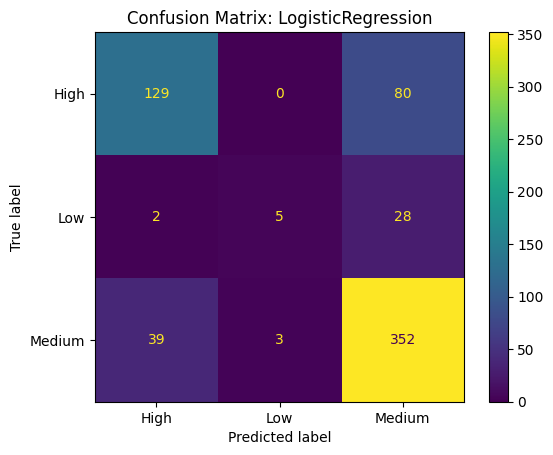

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


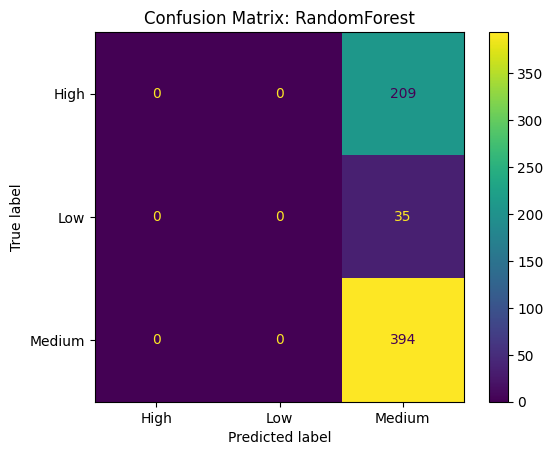

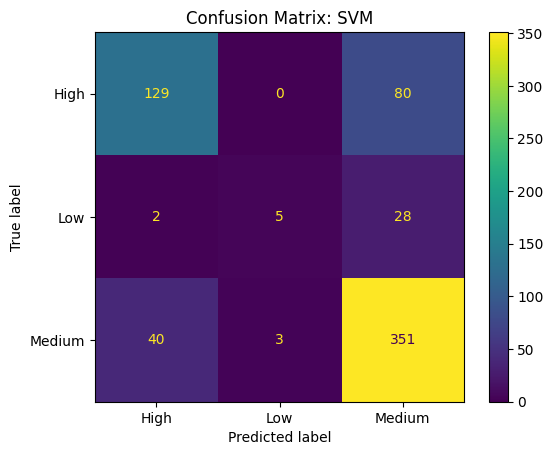

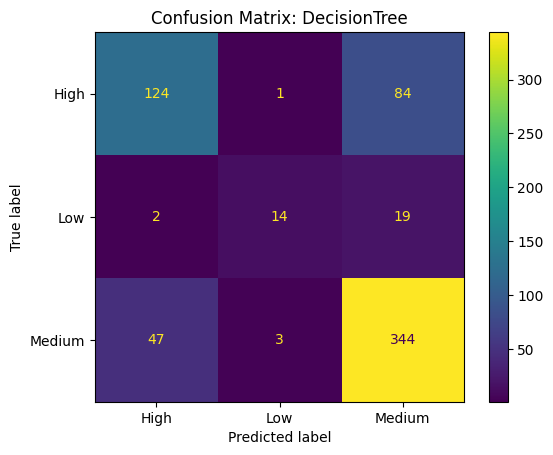

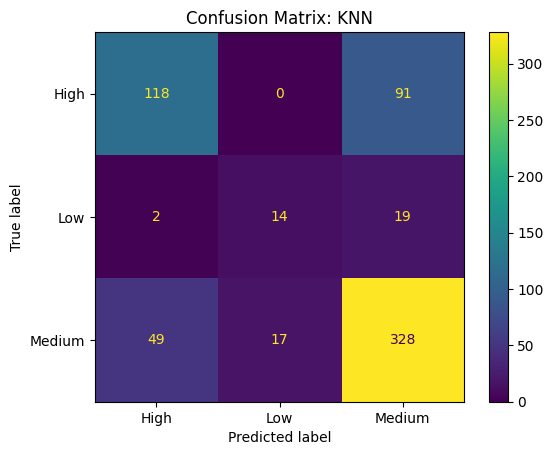

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt

# Bereinigten Datensatz einlesen
df = pd.read_csv("korr.csv")

# Funktion zur Einteilung von Spotify-Popularitätswerten in Klassen
def popularity_class(value):
    if value <= 40:
        return "Low"
    elif value <= 70:
        return "Medium"
    else:
        return "High"
# Neue Zielspalte basierend auf Spotify Popularity erzeugen
df["PopularityClass"] = df["Spotify Popularity"].apply(popularity_class)

# Unnötige Spalten (inkl. Zielwert) aus X entfernen
X = df.drop(columns=["Spotify Popularity", "PopularityClass"])

# Entferne Spalten, die nur fehlende Werte enthalten
missing_only_cols = [col for col in X.columns if X[col].isnull().all()]
if missing_only_cols:
    print(f"Entferne Spalten mit nur fehlenden Werten: {missing_only_cols}")
    X = X.drop(columns=missing_only_cols)

# Zielvariable definieren
y = df["PopularityClass"]

# Klassenverteilung anzeigen (z. B. wie viele 'Low', 'Medium', 'High')
print("Klassenverteilung:\n", y.value_counts())

# Daten in Trainings- und Validierungssets aufteilen, dabei Klassenverteilung erhalten (stratify)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Numerische Features auswählen
num_features = X.select_dtypes(include=["int64", "float64"]).columns
# Kategoriale Features auswählen (Objekte & boolesche Werte)
cat_features = X.select_dtypes(include=["object", "bool"]).columns

# Pipeline für numerische Daten: Fehlende Werte mit Median füllen & skalieren
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline für kategoriale Daten: Fehlende Werte füllen & OneHot kodieren
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
# Kombiniere beide Pipelines je nach Spaltentyp
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Verschiedene ML-Modelle definieren
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Jedes Modell in einer Pipeline aus Preprocessing + Klassifizierer trainieren & bewerten
for name, model in models.items():
    clf_pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    
    print(f"\n Modell: {name}")
     # Modell trainieren
    clf_pipeline.fit(X_train, y_train)
     # Vorhersagen generieren
    y_pred = clf_pipeline.predict(X_val)
    # Auswertung (Precision, Recall, F1 usw.)
    print(classification_report(y_val, y_pred, zero_division=0))

# Modelle nochmal definieren – dieessmal für GridSearch
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Parameter-Raster für jedes Modell
params = {
    "LogisticRegression": {"model__C": [0.1, 1, 10]},
    "RandomForest": {"model__n_estimators": [50, 100], "model__max_depth": [5, 10]},
    "SVM": {"model__C": [0.1, 1], "model__kernel": ['linear', 'rbf']},
    "DecisionTree": {"model__max_depth": [3, 5, 10]},
    "KNN": {"model__n_neighbors": [3, 5, 7]}
}

# Liste für Ergebnisse
results = []

# Alle Modelle in GridSearchCV durchlaufen
for name, model in models.items():
     # Pipeline mit Preprocessing + Modell
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

     # GridSearchCV-Setup (mit 5-facher Kreuzvalidierung & allen Parametern)
    grid = GridSearchCV(pipe, param_grid=params[name], cv=5, n_jobs=-1)
    # Zeitmessung starten
    start = time.time()
    # GridSearch ausführen
    grid.fit(X_train, y_train)
    
    # Zeitmessung beenden
    end = time.time()

    # Bestes Modell auswählen
    best_model = grid.best_estimator_
    # Vorhersagen treffen
    y_pred = best_model.predict(X_val)

    # Ergebnisse zusammenfassen
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1": f1_score(y_val, y_pred, average='weighted'),
        "Precision": precision_score(y_val, y_pred, average='weighted'),
        "Recall": recall_score(y_val, y_pred, average='weighted'),
        "MCC": matthews_corrcoef(y_val, y_pred),
        "Time (s)": round(end - start, 2)
    })
    # Zeige Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(best_model, X_val, y_val)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
